In [1]:
import sympy as sym
import jax.numpy as jnp

from sympy import factorial
from sympy.plotting import plot
from sympy.series.series import series

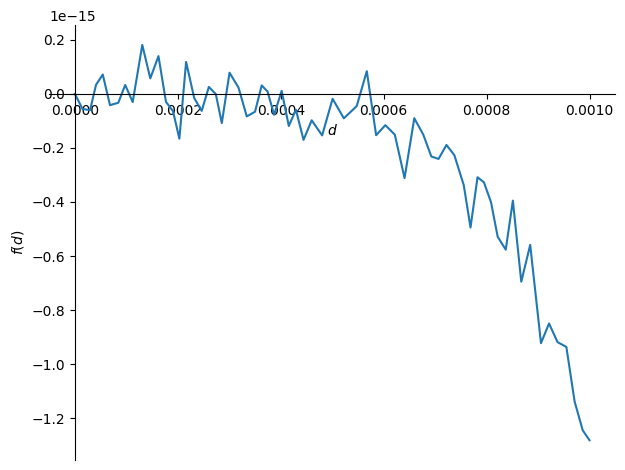

In [18]:
p = 2
exp_multiplier = -sym.sqrt(2 * p + 1)
coefficients = [factorial(p + i) / (factorial(i) * factorial(p - i)) * (sym.sqrt(8 * p + 4))**(p - i) for i in range(p + 1)]
powers = list(range(p,-1,-1))
norm_cons = factorial(p)/factorial(2*p)


d = sym.symbols('d')
matern = norm_cons*sum([c * (d**power) for c,power in zip(coefficients,powers)])*sym.exp(exp_multiplier * d)

S = series(sym.log(matern),d,0,2*p+1).removeO()

plot(sym.log(matern) - S,(d,0,.001))

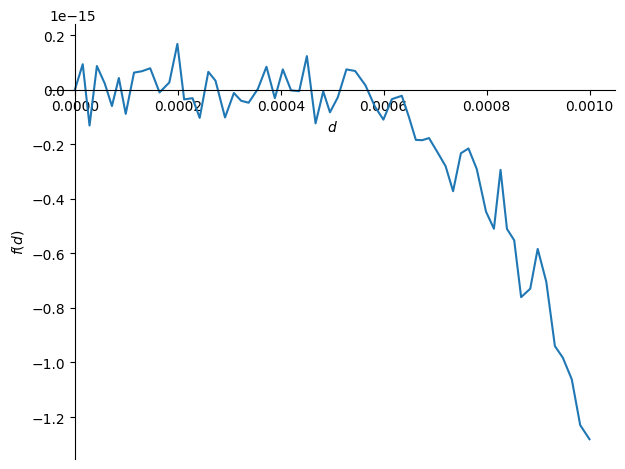